In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1. Hough直线检测

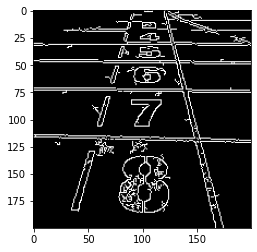

In [3]:
bgr = cv.imread('pic/road200x200.jpg')
I   = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)
E   = cv.Canny(I, 50, 400)

show(E)

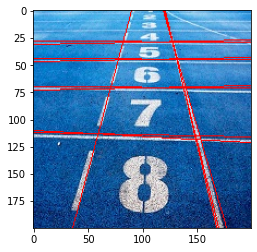

In [4]:
lines = cv.HoughLines(E, 2, np.pi/180, 140)

length = 1000

for (rho, theta) in lines.squeeze():
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho * a
    y0 = rho * b
    x1 = int(x0 + length*(-b))
    y1 = int(y0 + length*(a))
    x2 = int(x0 - length*(-b))
    y2 = int(y0 - length*(a))
    
    cv.line(bgr, (x1, y1), (x2, y2), (0,0,255), 1)
    
show(bgr)

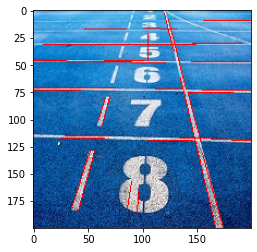

In [19]:
bgr = cv.imread('pic/road200x200.jpg')

lines = cv.HoughLinesP(E, 2, np.pi/180, 80, minLineLength=20, maxLineGap=3)
for (x1, y1, x2, y2) in lines.squeeze():
    cv.line(bgr, (x1, y1), (x2, y2), (0, 0, 255), 1)
    
show(bgr)

##  1.2 Hough直线检测编程实现

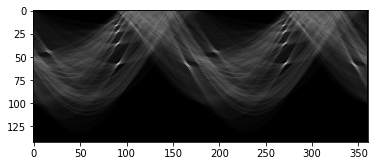

In [52]:
I = cv.imread('pic/road200x200.jpg', 0)
E = cv.Canny(I, 100, 400)
h, w = E.shape

dr = 2
dt = np.pi / 180
thresh = 130

rmin, rmax = 0, np.sqrt(h**2 + w**2)
tmin, tmax = 0, 2*np.pi

m = int((rmax - rmin) / dr) + 1
n = int((tmax - tmin) / dt) + 1
N = np.zeros((m,n), np.int32)

ys, xs = np.where(E == 255)
thetas = np.arange(tmin, tmax, dt)

for (x,y) in zip(xs, ys):
    rhos = np.abs(x * np.cos(thetas) + y * np.sin(thetas))
    ms = np.round(rhos / dr).astype(np.int32)
    ns = np.round(thetas / dt).astype(np.int32)
    for (m,n) in zip(ms, ns):
        N[m,n] += 1
        
show(N)

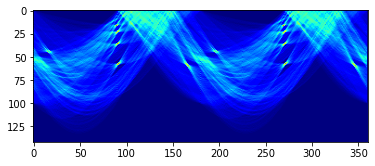

In [53]:
plt.imshow(N, cmap='jet')
plt.show()

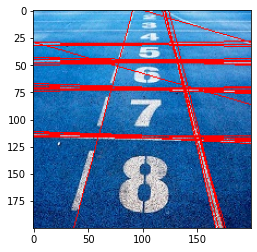

In [54]:
bgr = cv.imread('pic/road200x200.jpg')

rs, ts = np.where(N > thresh)
rs = rs * dr
ts = ts * dt

length = 1000

for (rho, theta) in zip(rs, ts):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho * a
    y0 = rho * b
    x1 = int(x0 + length*(-b))
    y1 = int(y0 + length*(a))
    x2 = int(x0 - length*(-b))
    y2 = int(y0 - length*(a))
    
    cv.line(bgr, (x1, y1), (x2, y2), (0,0,255), 1)
    
show(bgr)

## 2.1 OpenCV Hough圆检测

In [60]:
bgr = cv.imread('pic/moons150x400.jpg')
I   = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(I, cv.HOUGH_GRADIENT, dp=1.5, minDist=10, 
                param1=400, param2=50,
                minRadius=10, maxRadius=20)
circles

array([[[378.75, 107.25,  15.7 ],
        [ 21.75, 120.75,  17.8 ],
        [120.75,  35.25,  16.9 ],
        [ 51.75,  87.75,  16.6 ]]], dtype=float32)

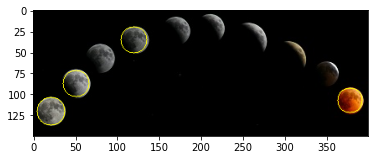

In [61]:
for (x,y,r) in circles.squeeze():
    cv.circle(bgr, (int(x), int(y)), int(r), (0,255,255), 1)
    
show(bgr)

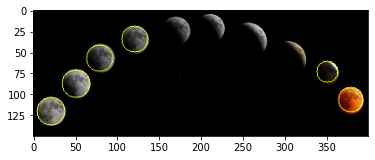

In [63]:
bgr = cv.imread('pic/moons150x400.jpg')
I   = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(I, cv.HOUGH_GRADIENT_ALT, dp=1.5, minDist=10, 
                param1=400, param2=0.5,
                minRadius=10, maxRadius=20)

for (x,y,r) in circles.squeeze():
    cv.circle(bgr, (int(x), int(y)), int(r), (0,255,255), 1)
    
show(bgr)

## 2.2 Hough圆检测——标准方法——编程实现

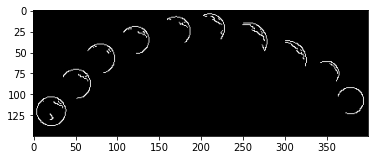

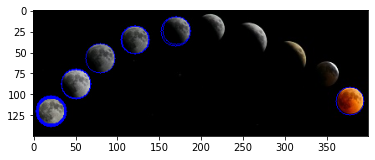

In [104]:
bgr = cv.imread('pic/moons150x400.jpg')
I   = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)
E   = cv.Canny(I, 200, 400)
show(E)

h, w = E.shape

rmin, rmax, dr = 17, 19, 1
nr = int((rmax - rmin) / dr) + 1

N = np.zeros((w, h, nr))

ys, xs = np.where(E == 255)
for (x,y) in zip(xs, ys):
    for r in range(rmin, rmax, dr):
        circ = np.zeros((h, w), np.uint8)
        cv.circle(circ, (x,y), r, 255, 1)
        bs, aas = np.where(circ == 255)
        
        N[aas, bs, r-rmin] += 1

thresh = N.max() / 2
aas, bs, rs = np.where(N >= thresh)

for (a,b,r) in zip(aas, bs, rs):
    cv.circle(bgr, (a,b), r+rmin, 255, 1)
    
show(bgr)

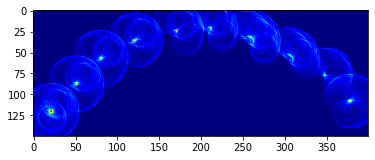

In [107]:
plt.imshow(N[:,:,0].T, cmap='jet')
plt.show()

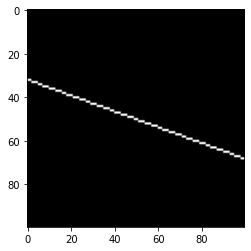

In [6]:
I = np.zeros((100,100), np.uint8)
h, w = I.shape

theta = np.pi / 9
px = np.cos(theta)
py = np.sin(theta)

lmax = w + h
x, y = 50, 50
x1 = int(x + px*lmax)
y1 = int(y + py*lmax)
x2 = int(x - px*lmax)
y2 = int(y - py*lmax)

show(cv.line(I, (x1,y1), (x2,y2), 255, 1))

## 3. Hough圆检测——梯度法

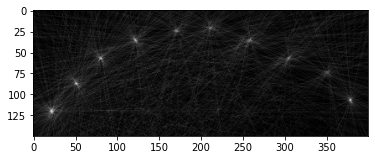

In [26]:
# I = np.zeros((200,200), np.uint8)
# cv.circle(I, (100,100), 80, 255, 3)
# I = cv.blur(I, (9,9))
# E = cv.Canny(I, 100, 200)

bgr = cv.imread('pic/moons150x400.jpg')
I   = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)
E   = cv.Canny(I, 200, 400)

h, w = E.shape

rmin, rmax, dr = 15, 20, 1

Ix = cv.Sobel(I, cv.CV_64F, 1, 0)
Iy = cv.Sobel(I, cv.CV_64F, 0, 1)
Ir = np.sqrt(Ix**2 + Iy**2)
Ix /= (Ir + 1e-5)
Iy /= (Ir + 1e-5)

N  = np.zeros((h, w), np.int32)
lmax = N.shape[0] + N.shape[1]

ys, xs = np.where(E == 255)
for (x, y) in zip(xs, ys):
    px = Ix[y, x]
    py = Iy[y, x]
    
    x1 = int(x + px*lmax)
    y1 = int(y + py*lmax)
    x2 = int(x - px*lmax)
    y2 = int(y - py*lmax)
    
    line = np.zeros(N.shape, np.uint8)
    cv.line(line, (x1, y1), (x2, y2), 255, 1)
    
    bs, aas = np.where(line == 255)
    N[bs, aas] += 1

show(N)

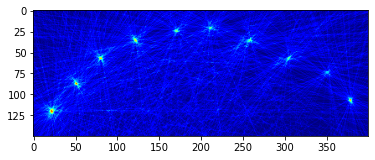

In [27]:
plt.imshow(N, cmap='jet')
plt.show()

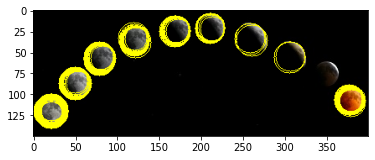

In [29]:
thresh1 = N.max() / 2
thresh2 = 30

bs, aas = np.where(N >= thresh1)
abr = []

for (a,b) in zip(aas, bs):
    for r in range(rmin, rmax, dr):
        circ = np.zeros(I.shape, np.uint8)
        cv.circle(circ, (a,b), r, 255, 1)
        intersection = cv.bitwise_and(circ, E)
        number = (intersection == 255).sum()
        if number > thresh2:
            abr.append((a,b,r))

for (a,b,r) in abr:
    cv.circle(bgr, (a,b), r, (0,255,255), 1)
    
show(bgr)